### Predicting sales of a product

In [1]:
#on basis of some day we have to predict the sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
#to big names for the columns changing them
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
#chcking dimension
df.shape

(107, 2)

In [6]:
#107 rows and two columns
#checing for the null values
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
#1 null in moth
#2 null in  sales

In [9]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
#removing the last two rows
df.drop([105,106],axis=0,inplace=True)

In [11]:
df.shape

(105, 2)

In [13]:
#succesfully removed the last two rows
#checking for the data types
df.dtypes

Month     object
Sales    float64
dtype: object

**pd.datetime(column)**

In [14]:
#month is of object data type
#changing the data type to datetime
df['Month']=pd.to_datetime(df['Month'])
df['Month']

0     1964-01-01
1     1964-02-01
2     1964-03-01
3     1964-04-01
4     1964-05-01
         ...    
100   1972-05-01
101   1972-06-01
102   1972-07-01
103   1972-08-01
104   1972-09-01
Name: Month, Length: 105, dtype: datetime64[ns]

In [16]:
#time series data index should be of date
df.set_index('Month',inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [19]:
#descriptive statistics
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


* visualise sales
* check if data is stationary or not

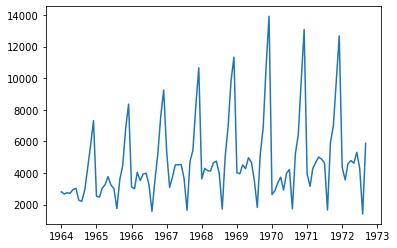

In [23]:
#plotting the sales
plt.plot(df.Sales)
plt.show()

In [24]:
#seasonal data example
#in the month of christmas  sales goes up and after christmas month or season sales goes down

In [25]:
#checking for the stationarity in data using statitistical method
#adfuller test--augmented dickey fuller test we get p value
#p value<0.05 stationoary
#performing the adfuller test

#installing the statsmodels lib
!pip install statsmodels

In [28]:
from statsmodels.tsa.stattools import adfuller

In [30]:
#2nd one is the pvalue
adfuller(df['Sales'])

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [ ]:
#hypothesis testing
#Ho--null hypothesis data is not stationary
#Ha--alternate hypothesis data is stationary

In [33]:
#according to python 2nd one is 1st one
#p_value is is similar to hypothesis testing
p_value=adfuller(df['Sales'])[1]
p_value

0.3639157716602417

As the p_value is greater than 0.05 it is not stationary data

In [34]:
adfuller(df.Sales)

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [39]:
#creating a function adfuller_test
def adfuller_test(col):
    results=adfuller(col)
    
    labels=['ADF test statistics','p_value','no oof lags used','no of observation']
    for label,result in zip(labels,results):
        print('{} : {}'.format(label,result))
    #hypothesis testing
    #Ho-Null Hypothesis Data is not Stationary
    #Ha-Alternate Hypothesis Data is Stationary
    if results[1]<=0.05:
        print('Data is stationary.reject the null hypthesis and accept the alternate hypothesis')
    else:
        print('Data is not stationary.accept the null hypothesis and reject the alternate hypothesis')
    

In [40]:
adfuller_test(df['Sales'])

ADF test statistics : -1.8335930563276297
p_value : 0.3639157716602417
no oof lags used : 11
no of observation : 93
Data is not stationary.accept the null hypothesis and reject the alternate hypothesis


**Goal is to make data Stationary**

In [42]:
#in time series the data should be stationary
#making your data stationary using differencing

In [43]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


**df.shift(1)** makes the rows move by 1 row downwards

In [44]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [45]:
df['Sales first diff.']=df['Sales']-df['Sales'].shift(1)
#this makes a new column which calculates the difffence between present month and previous month

In [46]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [47]:
#checking for the 1 year difference
#we should use shift(12)  1year -- 12months
df['Seasonal first diff.']=df['Sales']-df['Sales'].shift(12)
df.head(13)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [49]:
#calculating adfuller test on seasonal first diff.
#drop the NaN values in the columns
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics : -7.626619157213163
p_value : 2.060579696813685e-11
no oof lags used : 0
no of observation : 92
Data is stationary.reject the null hypthesis and accept the alternate hypothesis


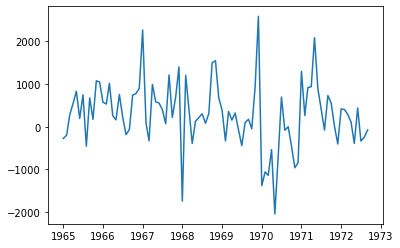

In [52]:
#as the p value is less than 0.05 the data is stationary
plt.plot(df['Seasonal first diff.'])
plt.show()

In [53]:
#if the p value tends to 0  we get stationar graph

In [54]:
#ARIMA---AR-I-MA
#auto regressive--p---PACF(partial auto correction facto)
#integrating--d---
#Moving Average---q---ACF(auto correction factor)
#d=1

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [57]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


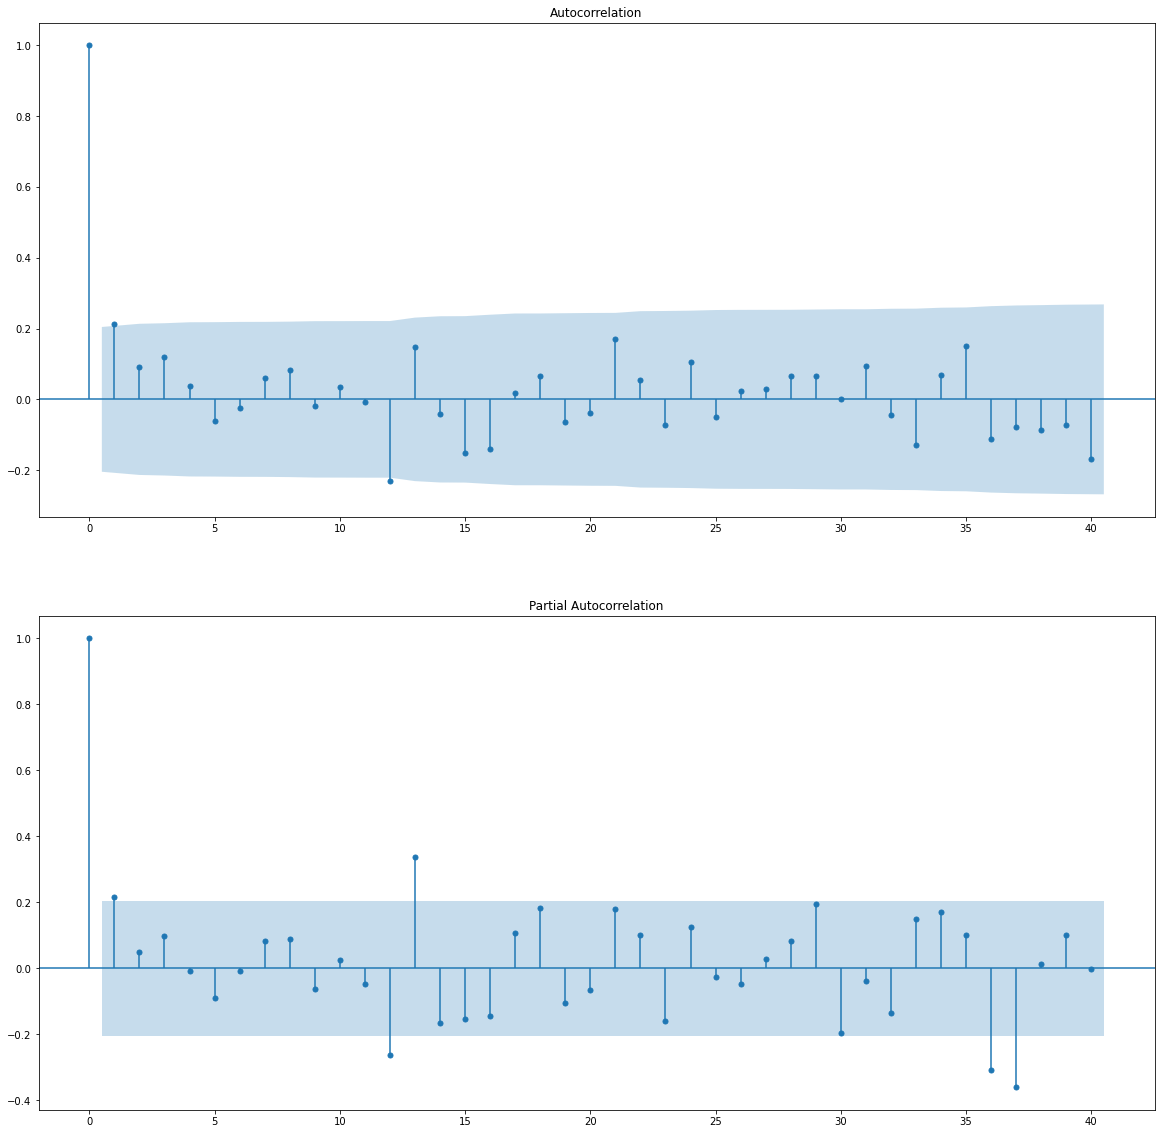

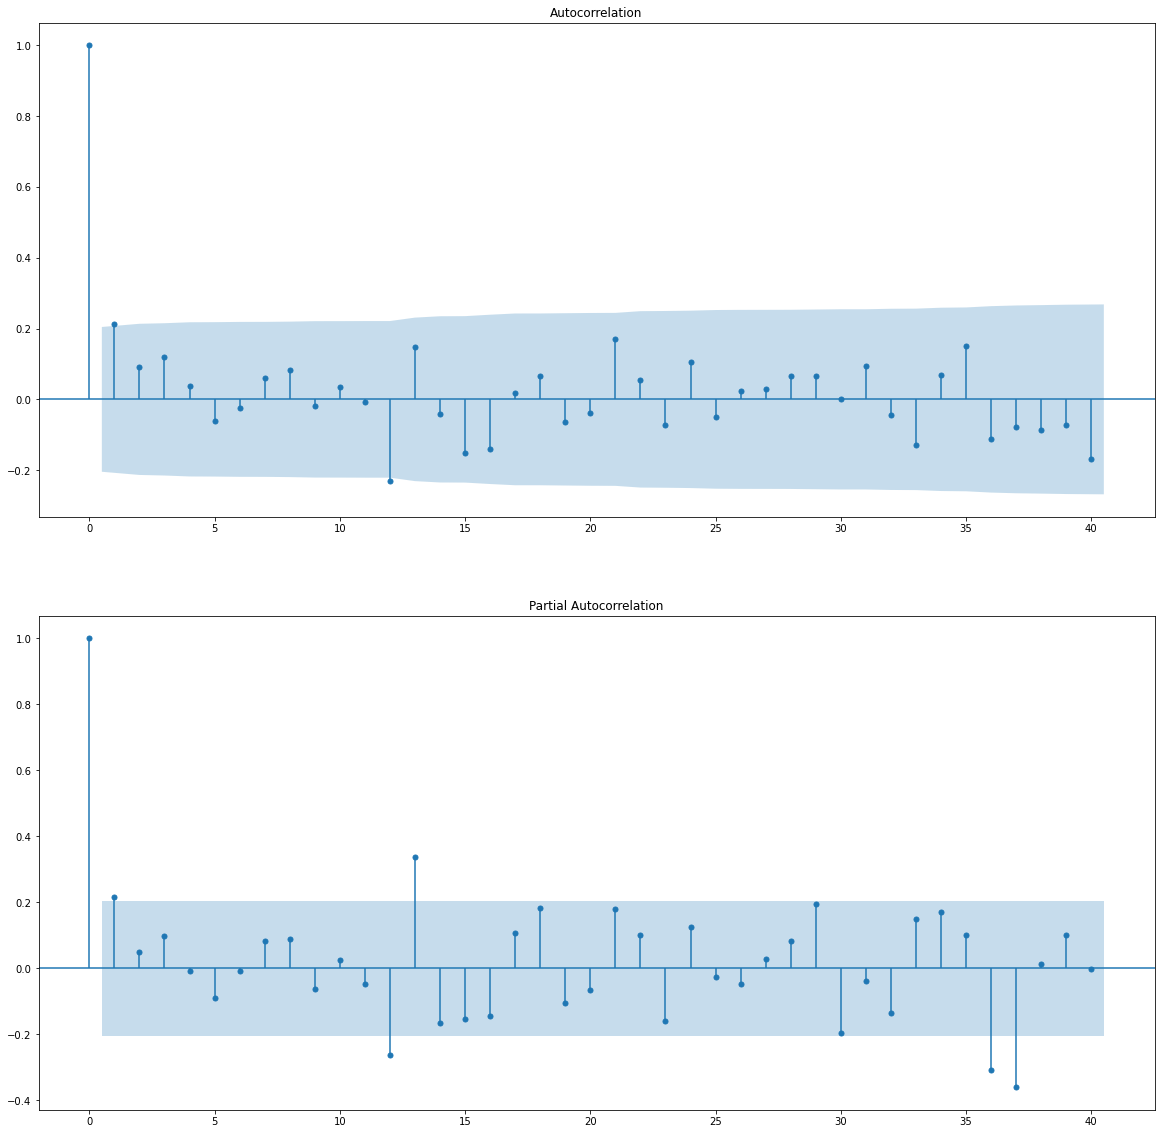

In [59]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,20))

plot_acf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax1)

plot_pacf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax2)

In [61]:
#p=1
#q=1 from pacf and acf graphs
(p,d,q)=(1,1,1)

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
model=ARIMA(df['Sales'],order=(p,d,q))
model=model.fit()

C:\Users\jbroh\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\jbroh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 21 Jan 2022   AIC                           1910.251
Time:                        12:54:28   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
df.shape

(105, 3)

In [67]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

In [68]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408
1971-08-01,1659.0,-2974.0,-79.0,218.374684
1971-09-01,5951.0,4292.0,730.0,107.738696
1971-10-01,6981.0,1030.0,557.0,59.684427


<AxesSubplot:xlabel='Month'>

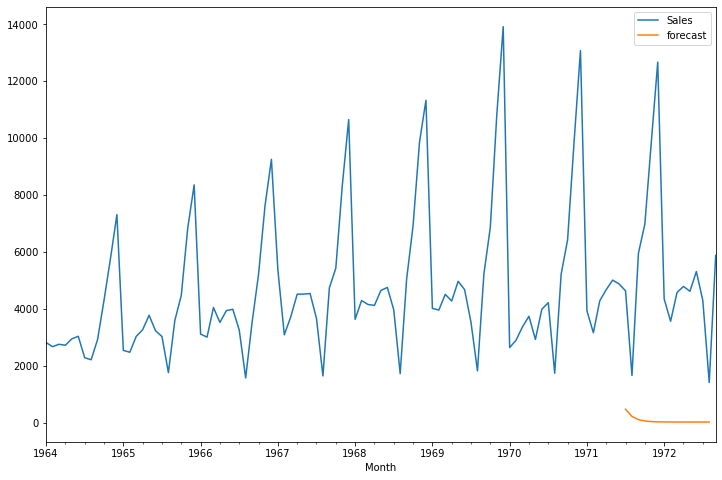

In [69]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [70]:
#for seasonal data ARIMA is not so useful

In [71]:
#WE USE SARIMAX--seasonal arimax
import statsmodels.api as sm

In [ ]:
#seasonal order =(p,d,q,shift value)
#shift value after which seasonal data looks like stationary

In [72]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(p,d,q),seasonal_order=(p,d,q,12))


C:\Users\jbroh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jbroh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [96]:
model=model.fit()

In [97]:
df['forecast_SARIMAX']=model.predict(start=90,end=103,dynamic=True)

In [98]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.093408,4437.323750
1971-08-01,1659.0,-2974.0,-79.0,218.374684,2050.747346
1971-09-01,5951.0,4292.0,730.0,107.738696,5493.376291
1971-10-01,6981.0,1030.0,557.0,59.684427,6752.039282


<AxesSubplot:xlabel='Month'>

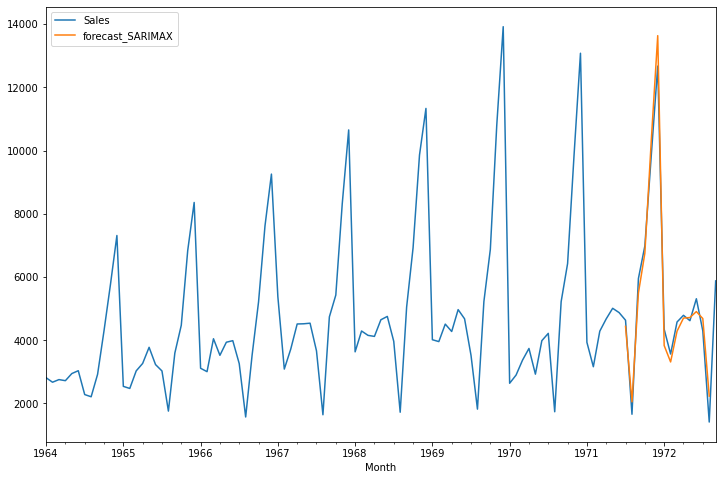

In [99]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

In [100]:
#creating additional dataset and doing sime predictions

In [101]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [102]:
#dateoffset
from pandas.tseries.offsets import DateOffset

In [103]:
df.index[-1]+DateOffset(months=0)

Timestamp('1972-09-01 00:00:00')

In [104]:
df.index[-1]+DateOffset(months=1)

Timestamp('1972-10-01 00:00:00')

In [105]:
[df.index[-1]+DateOffset(months=x) for x in range(25)]

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00')]

In [106]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(25)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00')]

In [107]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [108]:
future_dataset

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [109]:
future_df=pd.concat([df,future_dataset])

In [110]:
df.shape

(105, 5)

In [111]:
future_df.shape

(129, 5)

In [112]:
future_df.tail(18)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN
1973-08-01,NaN,NaN,NaN,NaN,NaN
1973-09-01,NaN,NaN,NaN,NaN,NaN
1973-10-01,NaN,NaN,NaN,NaN,NaN
1973-11-01,NaN,NaN,NaN,NaN,NaN
1973-12-01,NaN,NaN,NaN,NaN,NaN
1974-01-01,NaN,NaN,NaN,NaN,NaN


In [113]:
future_df['forecast_SARIMAX']=model.predict(start=104,end=129)

In [114]:
future_df.tail(10)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1973-12-01,NaN,NaN,NaN,NaN,13057.170367
1974-01-01,NaN,NaN,NaN,NaN,4730.977635
1974-02-01,NaN,NaN,NaN,NaN,3915.099992
1974-03-01,NaN,NaN,NaN,NaN,4961.175118
1974-04-01,NaN,NaN,NaN,NaN,5189.237316
1974-05-01,NaN,NaN,NaN,NaN,5119.279939
1974-06-01,NaN,NaN,NaN,NaN,5675.026730
1974-07-01,NaN,NaN,NaN,NaN,4725.987443
1974-08-01,NaN,NaN,NaN,NaN,1823.260262
1974-09-01,NaN,NaN,NaN,NaN,6289.842104


In [115]:
future_df.head(10)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN,NaN
1964-10-01,4301.0,1379.0,NaN,NaN,NaN


<AxesSubplot:>

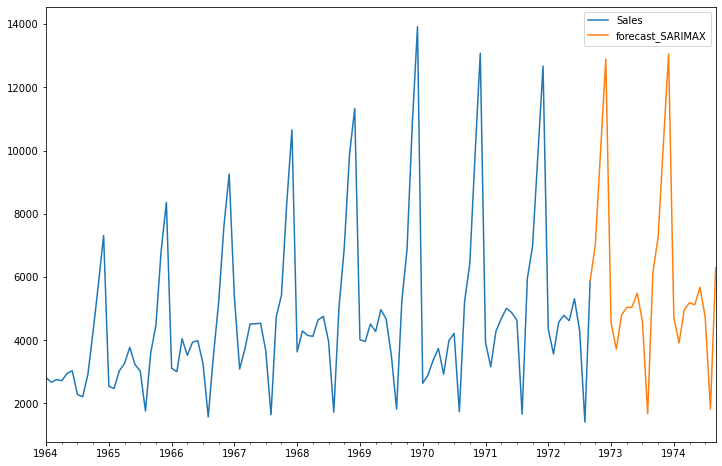

In [116]:
future_df[['Sales','forecast_SARIMAX']].plot(figsize=(12,8))

1972-10-01    7023.698655
Freq: MS, dtype: float64